<img src="https://raw.githubusercontent.com/ulewis/Ejemplos/main/Im%C3%A1genes/PORTADA_PI1.png" alt="UPCH" width="800">


# **LABORATORIO 4: – USO DE BITalino PARA EMG**


**Tabla de contenidos**

1. [Introducción](#id1)
2. [Objetivos](#id2)
3. [Materiales y equipos](#id3)
4. [Resultados](#id4)\
   4.1 [Conexión usada](#id5)\
   4.2 [Prueba 1: Bícep brachii](#id6)\
   4.3 [Prueba 2: Músculo aductor del pulgar](#id7)\
   4.4 [Prueba 3: Músculo gastrocnemio](#id8)\
   4.5 [Prueba 4: Tricep braquial](#id9)\
   4.6 [Archivos utilizados](#id10)
6. [Conclusiones y recomendaciones](#id11)
6. [Referencias bibliográficas](#id12)


## **1. Introducción** <a name="id1"></a>

---
Mencionar electricidad miografica
Aplicaciones de EMG y uso


## **2. Objetivos** <a name="id2"></a>

---

* Adquirir señales biomédicas de EMG.
* Hacer una correcta configuración de BiTalino.
* Extraer la información de las señales EMG y ECG del software OpenSignals (r)evolution.
* Plotear las señales electromiográficas en Python.

## **3. Materiales y equipos** <a name="id3"></a>

---

<div align="center">

|  **Modelo**  | **Descripción** | **Cantidad** |
|:------------:|:---------------:|:------------:|
| (R)EVOLUTION |   Kit BITalino  |       1      |
|       -      |      Laptop     |       1      |
|       -      |    Electrodos superficiales   |       3      |


</div>

<p align="justify">
<p align="center"><img src="../../../Otros/Imagenes/Lab4_EMG/image_materiales.jpg" width="400" height="266"></p>
</p>

## **4. Resultados** <a name="id4"></a>

---

### **4.1. Conexión usada** <a name="id5"></a>

Se utilizó la conexión EMG en la placa Bitalino utilizando el sensor EMG de 3 electrodos como se muestra a continuación.
<p align="justify">
<p align="center"><img src="../../../Otros/Imagenes/Lab4_EMG/bitalino.jpg" width="400" height="266"></p>
</p>
El siguiente procedimiento consiste en colocar los electrodos EMG en el usuario de prueba. Para ello se utilizó la Guía De Procedimiento de Electromiografía y velocidad de conducción de nervios periféricos del año 2020 elaborada por el Instituto Nacional del Niño de San Borja para el Ministerio de Salud (MINSA) *CAMBIAR Y BUSCAR UNA GUIA DE PROCEDIMIENTO 

### **4.2. Prueba 1: Bícep brachii** <a name="id6"></a>

Descripción de prueba 1, fundamento de la señal adquirida (porque usaran ese grupo muscular de interes)
<p align="justify">
<p align="center"><img src="../../../Otros/Imagenes/Lab4_EMG/Biceps1.jpg" width="600" height="300"></p>
</p>

<div align="center">
   
|  **Reposo**  | **Sin oposición** | **Con oposición** |
|:------------:|:---------------:|:------------:|
|<video src="https://user-images.githubusercontent.com/b49875f0-82ef-4d27-a2aa-e8e5e6103e9a.mp4"></video>|<video src="https://user-images.githubusercontent.com/092f3871-e25f-4d7b-a778-03641931fcaf.mp4"></video>|<video src= "https://user-images.githubusercontent.com/36d881ed-29d1-4178-844e-4b9741314f90.mp4"></video>|

[<img src="https://cdn.icon-icons.com/icons2/1713/PNG/512/iconfinder-videologoplayicon-3993847_112649.png" width="20%" height="20%">](https://www.youtube.com/playlist?list=PLKyz-4YrUo3Q4-50zDqIl1RbkGDer-eyK)

</div>

**Ploteo de la señal en Python: Dominio del tiempo y frecuencia**
   A coninuación se muestran la data obtenida en el dominio del tiempo y dominio de la frecuencia
   - Reposo


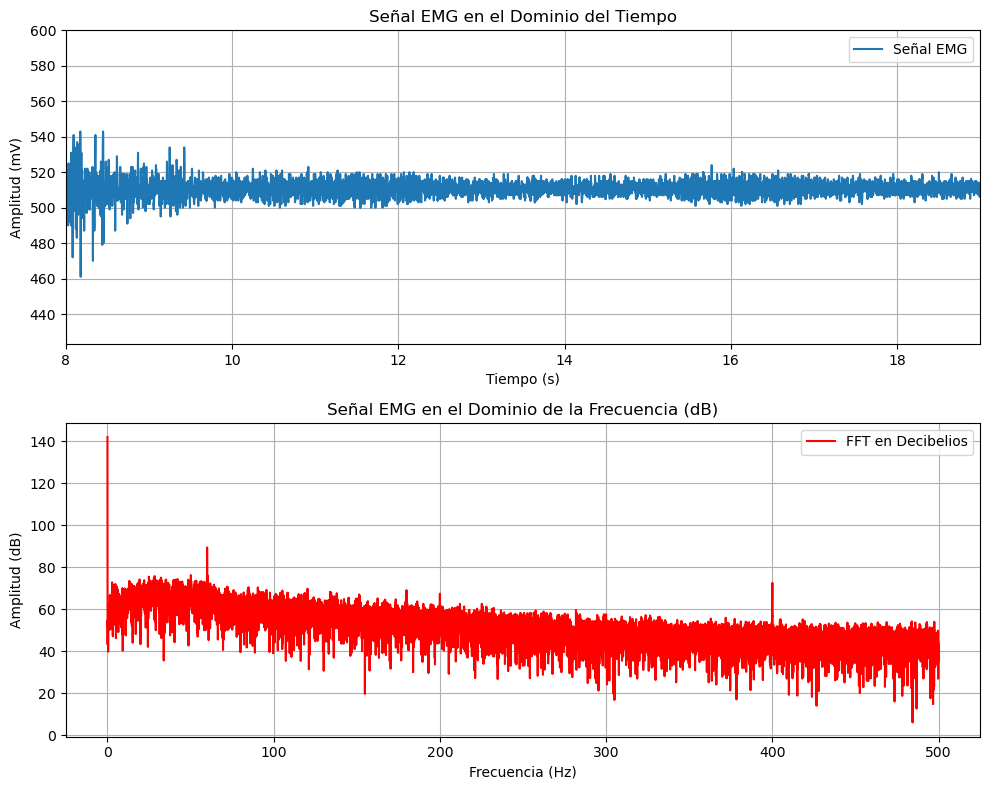

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar el archivo de texto, asegurándonos de especificar la ruta correcta
data = np.loadtxt('C:/Users/user/Desktop/Signals/sEMG_signals/Bicep_brachii/biceps_reposo.txt', comments='#')

# Extraer la columna correspondiente a la señal EMG (última columna: A1)
emg_signal = data[:, -1]

# Configurar la tasa de muestreo (1000 Hz, según la configuración del archivo)
sampling_rate = 1000  # Frecuencia de muestreo en Hz
n_samples = len(emg_signal)

# Crear el vector de tiempo
time = np.arange(n_samples) / sampling_rate

# Transformada de Fourier para obtener la señal en el dominio de la frecuencia
emg_fft = fft(emg_signal)
frequencies = fftfreq(n_samples, 1/sampling_rate)

# Calcular la magnitud de la FFT en decibelios
fft_magnitude = np.abs(emg_fft[:n_samples // 2])
fft_magnitude_db = 20 * np.log10(fft_magnitude)

# Frecuencias positivas para graficar
positive_freqs = frequencies[:n_samples // 2]

# Crear una figura con dos subplots (2 filas, 1 columna)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Graficar la señal EMG en el dominio del tiempo en el primer subplot
ax1.plot(time, emg_signal, label="Señal EMG")
ax1.set_title("Señal EMG en el Dominio del Tiempo")
ax1.set_xlabel("Tiempo (s)")
ax1.set_ylabel("Amplitud (mV)")  # Ajusta la unidad si es necesario
ax1.set_xlim([8, 19])
ax1.set_ylim([1000, 300])
ax1.grid(True)
ax1.legend()

# Graficar la FFT en decibelios en el segundo subplot
ax2.plot(positive_freqs, fft_magnitude_db, label="FFT en Decibelios", color='r')
ax2.set_title("Señal EMG en el Dominio de la Frecuencia (dB)")
ax2.set_xlabel("Frecuencia (Hz)")
ax2.set_ylabel("Amplitud (dB)")
ax2.grid(True)
ax2.legend()

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar la figura con ambas gráficas
plt.show()


   - Sin oposición


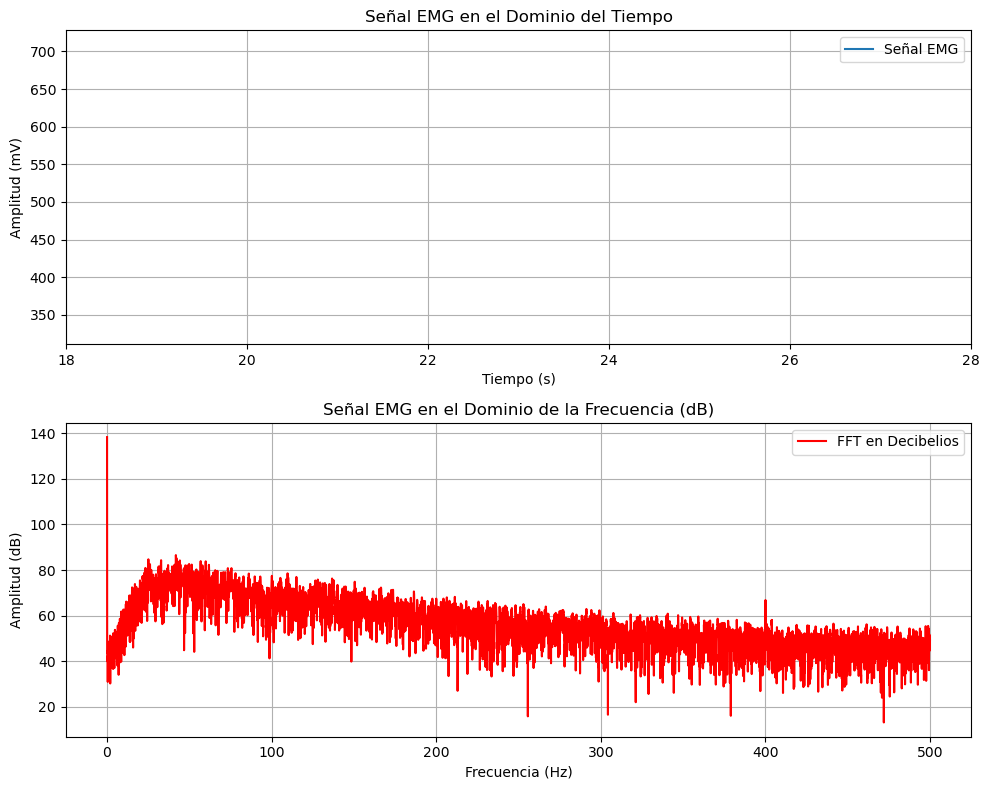

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar el archivo de texto, asegurándonos de especificar la ruta correcta
data = np.loadtxt('C:/Users/user/Desktop/Signals/sEMG_signals/Bicep_brachii/biceps_voluntario.txt', comments='#')

# Extraer la columna correspondiente a la señal EMG (última columna: A1)
emg_signal = data[:, -1]

# Configurar la tasa de muestreo (1000 Hz, según la configuración del archivo)
sampling_rate = 1000  # Frecuencia de muestreo en Hz
n_samples = len(emg_signal)

# Crear el vector de tiempo
time = np.arange(n_samples) / sampling_rate

# Transformada de Fourier para obtener la señal en el dominio de la frecuencia
emg_fft = fft(emg_signal)
frequencies = fftfreq(n_samples, 1/sampling_rate)

# Calcular la magnitud de la FFT en decibelios
fft_magnitude = np.abs(emg_fft[:n_samples // 2])
fft_magnitude_db = 20 * np.log10(fft_magnitude)

# Frecuencias positivas para graficar
positive_freqs = frequencies[:n_samples // 2]

# Crear una figura con dos subplots (2 filas, 1 columna)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Graficar la señal EMG en el dominio del tiempo en el primer subplot
ax1.plot(time, emg_signal, label="Señal EMG")
ax1.set_title("Señal EMG en el Dominio del Tiempo")
ax1.set_xlabel("Tiempo (s)")
ax1.set_ylabel("Amplitud (mV)")  # Ajusta la unidad si es necesario
ax1.set_xlim([2, 12])
ax1.set_ylim([1000, 300])
ax1.grid(True)
ax1.legend()

# Graficar la FFT en decibelios en el segundo subplot
ax2.plot(positive_freqs, fft_magnitude_db, label="FFT en Decibelios", color='r')
ax2.set_title("Señal EMG en el Dominio de la Frecuencia (dB)")
ax2.set_xlabel("Frecuencia (Hz)")
ax2.set_ylabel("Amplitud (dB)")
ax2.grid(True)
ax2.legend()

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar la figura con ambas gráficas
plt.show()


   - Con oposición

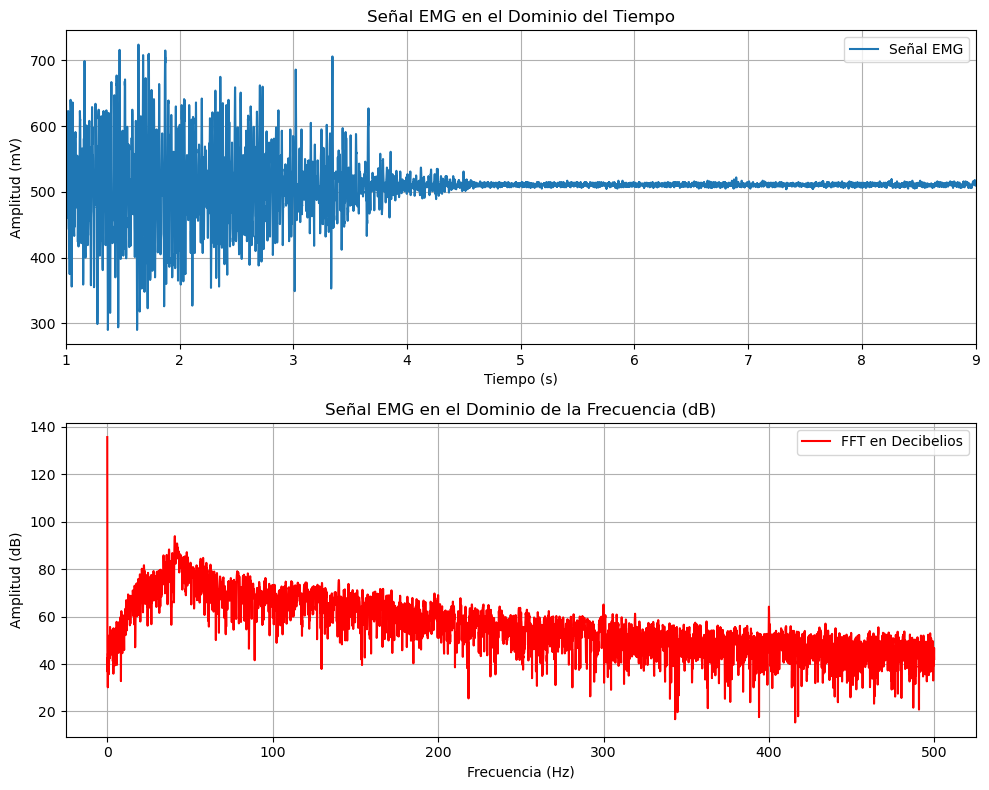

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar el archivo de texto, asegurándonos de especificar la ruta correcta
data = np.loadtxt('C:/Users/user/Desktop/Signals/sEMG_signals/Bicep_brachii/biceps_contra.txt', comments='#')

# Extraer la columna correspondiente a la señal EMG (última columna: A1)
emg_signal = data[:, -1]

# Configurar la tasa de muestreo (1000 Hz, según la configuración del archivo)
sampling_rate = 1000  # Frecuencia de muestreo en Hz
n_samples = len(emg_signal)

# Crear el vector de tiempo
time = np.arange(n_samples) / sampling_rate

# Transformada de Fourier para obtener la señal en el dominio de la frecuencia
emg_fft = fft(emg_signal)
frequencies = fftfreq(n_samples, 1/sampling_rate)

# Calcular la magnitud de la FFT en decibelios
fft_magnitude = np.abs(emg_fft[:n_samples // 2])
fft_magnitude_db = 20 * np.log10(fft_magnitude)

# Frecuencias positivas para graficar
positive_freqs = frequencies[:n_samples // 2]

# Crear una figura con dos subplots (2 filas, 1 columna)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Graficar la señal EMG en el dominio del tiempo en el primer subplot
ax1.plot(time, emg_signal, label="Señal EMG")
ax1.set_title("Señal EMG en el Dominio del Tiempo")
ax1.set_xlabel("Tiempo (s)")
ax1.set_ylabel("Amplitud (mV)")  # Ajusta la unidad si es necesario
ax1.set_xlim([1, 9])
ax1.set_ylim([1000, 300])
ax1.grid(True)
ax1.legend()

# Graficar la FFT en decibelios en el segundo subplot
ax2.plot(positive_freqs, fft_magnitude_db, label="FFT en Decibelios", color='r')
ax2.set_title("Señal EMG en el Dominio de la Frecuencia (dB)")
ax2.set_xlabel("Frecuencia (Hz)")
ax2.set_ylabel("Amplitud (dB)")
ax2.grid(True)
ax2.legend()

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar la figura con ambas gráficas
plt.show()


### **4.3. Prueba 2: Músculo aductor del pulgar** <a name="id7"></a>

Descripción de prueba 2, fundamento de la señal adquirida (porque usaran ese grupo muscular de interes)
<p align="justify">
<p align="center"><img src="../../../Otros/Imagenes/Lab4_EMG/aductor pulgar.jpg" width="650" height="250"></p>
</p>

<div align="center">
   
|  **Reposo**  | **Sin oposición** | **Con oposición** |
|:------------:|:---------------:|:------------:|
|<video src="https://user-images.githubusercontent.com/67a14538-64fe-4a2a-a8d6-a3e4a3f076d5.mp4"></video>|<video src="https://user-images.githubusercontent.com/af3715f6-c9ae-4d9e-88d6-e9c4592ccc69.mp4"></video>|<video src= "https://user-images.githubusercontent.com/077e5478-1f01-4cbe-a1b1-619135a5ab11.mp4"></video>|

[<img src="https://cdn.icon-icons.com/icons2/1713/PNG/512/iconfinder-videologoplayicon-3993847_112649.png" width="20%" height="20%">](https://www.youtube.com/playlist?list=PLKyz-4YrUo3R1rk6B5YFyBnburL7kmY8D)
</div>

**Ploteo de la señal en Python: Dominio del tiempo y frecuencia**
   A coninuación se muestran la data obtenida en el dominio del tiempo y dominio de la frecuencia
   - Reposo


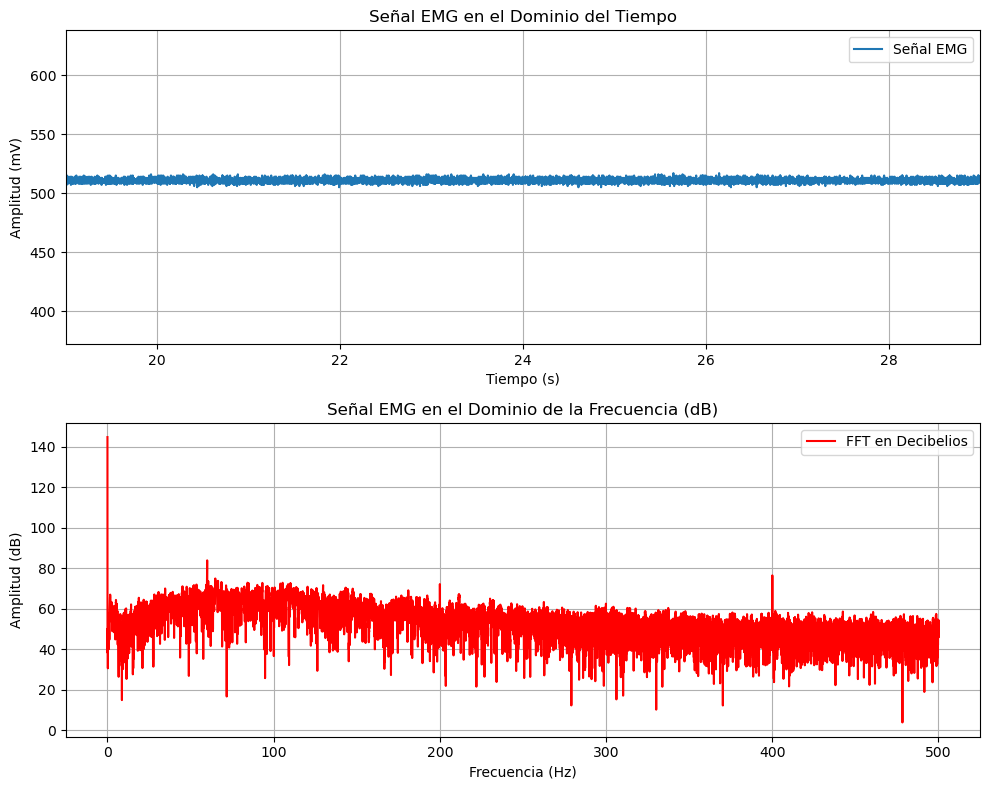

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar el archivo de texto, asegurándonos de especificar la ruta correcta
data = np.loadtxt('C:/Users/user/Desktop/Signals/sEMG_signals/DedoPulgar/dedo_reposo.txt', comments='#')

# Extraer la columna correspondiente a la señal EMG (última columna: A1)
emg_signal = data[:, -1]

# Configurar la tasa de muestreo (1000 Hz, según la configuración del archivo)
sampling_rate = 1000  # Frecuencia de muestreo en Hz
n_samples = len(emg_signal)

# Crear el vector de tiempo
time = np.arange(n_samples) / sampling_rate

# Transformada de Fourier para obtener la señal en el dominio de la frecuencia
emg_fft = fft(emg_signal)
frequencies = fftfreq(n_samples, 1/sampling_rate)

# Calcular la magnitud de la FFT en decibelios
fft_magnitude = np.abs(emg_fft[:n_samples // 2])
fft_magnitude_db = 20 * np.log10(fft_magnitude)

# Frecuencias positivas para graficar
positive_freqs = frequencies[:n_samples // 2]

# Crear una figura con dos subplots (2 filas, 1 columna)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Graficar la señal EMG en el dominio del tiempo en el primer subplot
ax1.plot(time, emg_signal, label="Señal EMG")
ax1.set_title("Señal EMG en el Dominio del Tiempo")
ax1.set_xlabel("Tiempo (s)")
ax1.set_ylabel("Amplitud (mV)")  # Ajusta la unidad si es necesario
ax1.set_xlim([19, 29])
ax1.set_ylim([1000, 300])
ax1.grid(True)
ax1.legend()

# Graficar la FFT en decibelios en el segundo subplot
ax2.plot(positive_freqs, fft_magnitude_db, label="FFT en Decibelios", color='r')
ax2.set_title("Señal EMG en el Dominio de la Frecuencia (dB)")
ax2.set_xlabel("Frecuencia (Hz)")
ax2.set_ylabel("Amplitud (dB)")
ax2.grid(True)
ax2.legend()

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar la figura con ambas gráficas
plt.show()


   - Sin oposición


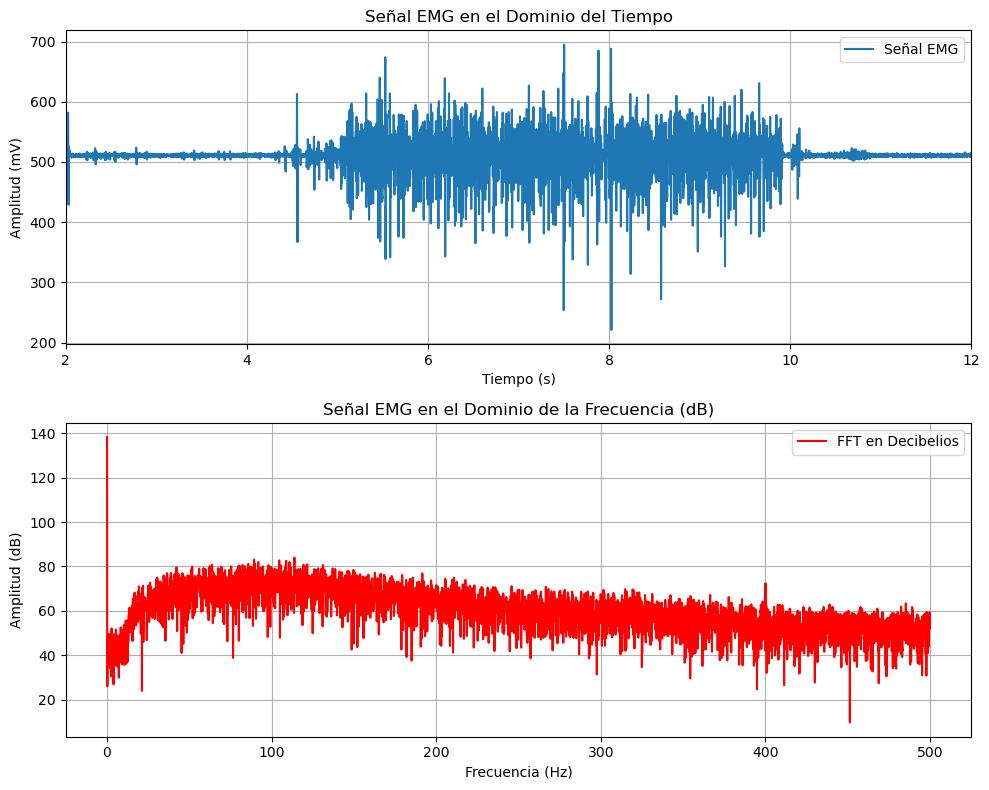

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar el archivo de texto, asegurándonos de especificar la ruta correcta
data = np.loadtxt('C:/Users/user/Desktop/Signals/sEMG_signals/DedoPulgar/dedo_voluntario.txt', comments='#')

# Extraer la columna correspondiente a la señal EMG (última columna: A1)
emg_signal = data[:, -1]

# Configurar la tasa de muestreo (1000 Hz, según la configuración del archivo)
sampling_rate = 1000  # Frecuencia de muestreo en Hz
n_samples = len(emg_signal)

# Crear el vector de tiempo
time = np.arange(n_samples) / sampling_rate

# Transformada de Fourier para obtener la señal en el dominio de la frecuencia
emg_fft = fft(emg_signal)
frequencies = fftfreq(n_samples, 1/sampling_rate)

# Calcular la magnitud de la FFT en decibelios
fft_magnitude = np.abs(emg_fft[:n_samples // 2])
fft_magnitude_db = 20 * np.log10(fft_magnitude)

# Frecuencias positivas para graficar
positive_freqs = frequencies[:n_samples // 2]

# Crear una figura con dos subplots (2 filas, 1 columna)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Graficar la señal EMG en el dominio del tiempo en el primer subplot
ax1.plot(time, emg_signal, label="Señal EMG")
ax1.set_title("Señal EMG en el Dominio del Tiempo")
ax1.set_xlabel("Tiempo (s)")
ax1.set_ylabel("Amplitud (mV)")  # Ajusta la unidad si es necesario
ax1.set_xlim([2, 12])
ax1.set_ylim([1000, 300])
ax1.grid(True)
ax1.legend()

# Graficar la FFT en decibelios en el segundo subplot
ax2.plot(positive_freqs, fft_magnitude_db, label="FFT en Decibelios", color='r')
ax2.set_title("Señal EMG en el Dominio de la Frecuencia (dB)")
ax2.set_xlabel("Frecuencia (Hz)")
ax2.set_ylabel("Amplitud (dB)")
ax2.grid(True)
ax2.legend()

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar la figura con ambas gráficas
plt.show()


   - Con oposición

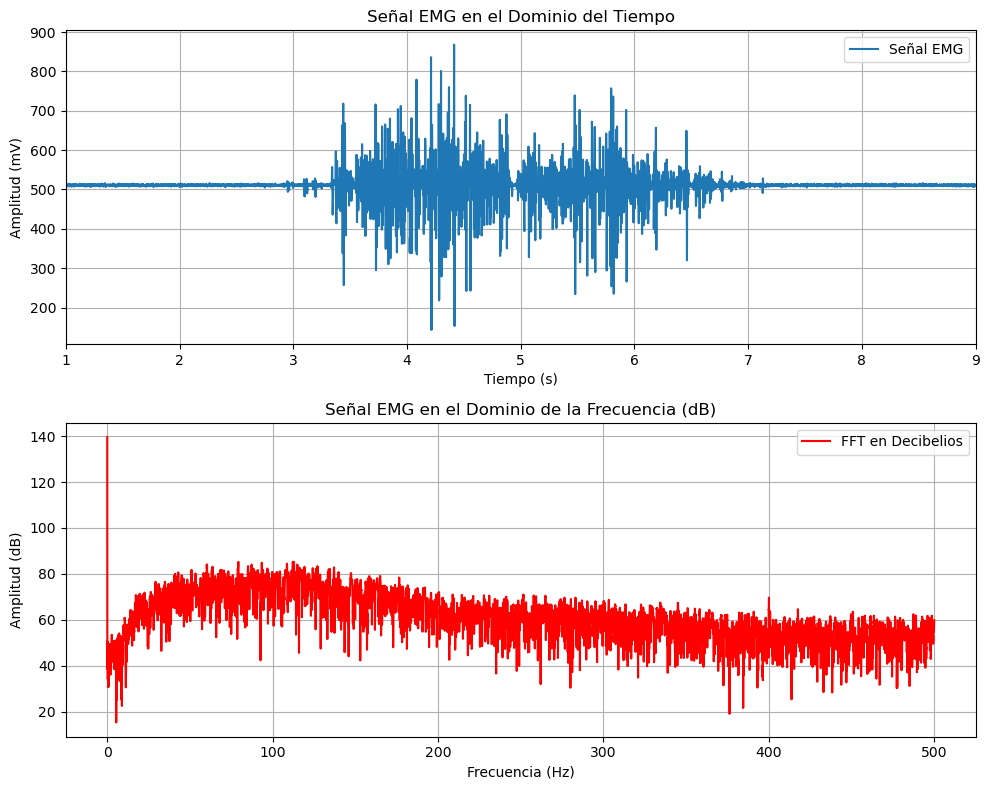

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar el archivo de texto, asegurándonos de especificar la ruta correcta
data = np.loadtxt('C:/Users/user/Desktop/Signals/sEMG_signals/DedoPulgar/dedo_contrs.txt', comments='#')

# Extraer la columna correspondiente a la señal EMG (última columna: A1)
emg_signal = data[:, -1]

# Configurar la tasa de muestreo (1000 Hz, según la configuración del archivo)
sampling_rate = 1000  # Frecuencia de muestreo en Hz
n_samples = len(emg_signal)

# Crear el vector de tiempo
time = np.arange(n_samples) / sampling_rate

# Transformada de Fourier para obtener la señal en el dominio de la frecuencia
emg_fft = fft(emg_signal)
frequencies = fftfreq(n_samples, 1/sampling_rate)

# Calcular la magnitud de la FFT en decibelios
fft_magnitude = np.abs(emg_fft[:n_samples // 2])
fft_magnitude_db = 20 * np.log10(fft_magnitude)

# Frecuencias positivas para graficar
positive_freqs = frequencies[:n_samples // 2]

# Crear una figura con dos subplots (2 filas, 1 columna)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Graficar la señal EMG en el dominio del tiempo en el primer subplot
ax1.plot(time, emg_signal, label="Señal EMG")
ax1.set_title("Señal EMG en el Dominio del Tiempo")
ax1.set_xlabel("Tiempo (s)")
ax1.set_ylabel("Amplitud (mV)")  # Ajusta la unidad si es necesario
ax1.set_xlim([1, 9])
ax1.set_ylim([1000, 300])
ax1.grid(True)
ax1.legend()

# Graficar la FFT en decibelios en el segundo subplot
ax2.plot(positive_freqs, fft_magnitude_db, label="FFT en Decibelios", color='r')
ax2.set_title("Señal EMG en el Dominio de la Frecuencia (dB)")
ax2.set_xlabel("Frecuencia (Hz)")
ax2.set_ylabel("Amplitud (dB)")
ax2.grid(True)
ax2.legend()

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar la figura con ambas gráficas
plt.show()


### **4.4. Prueba 3: Músculo gastrocnemio** <a name="id8"></a>

Descripción de prueba 3, fundamento de la señal adquirida (porque usaran ese grupo muscular de interes)
<p align="justify">
<p align="center"><img src="../../../Otros/Imagenes/Lab4_EMG/Gastrocnemio.jpg" width="700" height="400"></p>
</p>

<div align="center">
   
|  **Reposo**  | **Esfuerzo** | **Sobreesfuerzo sin oposición** |
|:------------:|:---------------:|:------------:|
|<video src="https://user-images.githubusercontent.com/27d392ad-a041-4e54-8f90-0a6b14e80f0f.mp4"></video>|<video src="https://user-images.githubusercontent.com/75a6c4f4-0524-44a8-b6da-cfe3df00bb69.mp4"></video>|<video src= "https://user-images.githubusercontent.com/68bb1c7a-39ac-415c-a21c-0ae45fc841b5.mp4"></video>|

[<img src="https://cdn.icon-icons.com/icons2/1713/PNG/512/iconfinder-videologoplayicon-3993847_112649.png" width="20%" height="20%">](https://www.youtube.com/playlist?list=PLKyz-4YrUo3RR13SN4Ai1WwyWk6ezuXg1)

</div>

**Ploteo de la señal en Python: Dominio del tiempo y frecuencia**
   A coninuación se muestran la data obtenida en el dominio del tiempo y dominio de la frecuencia
   - Reposo


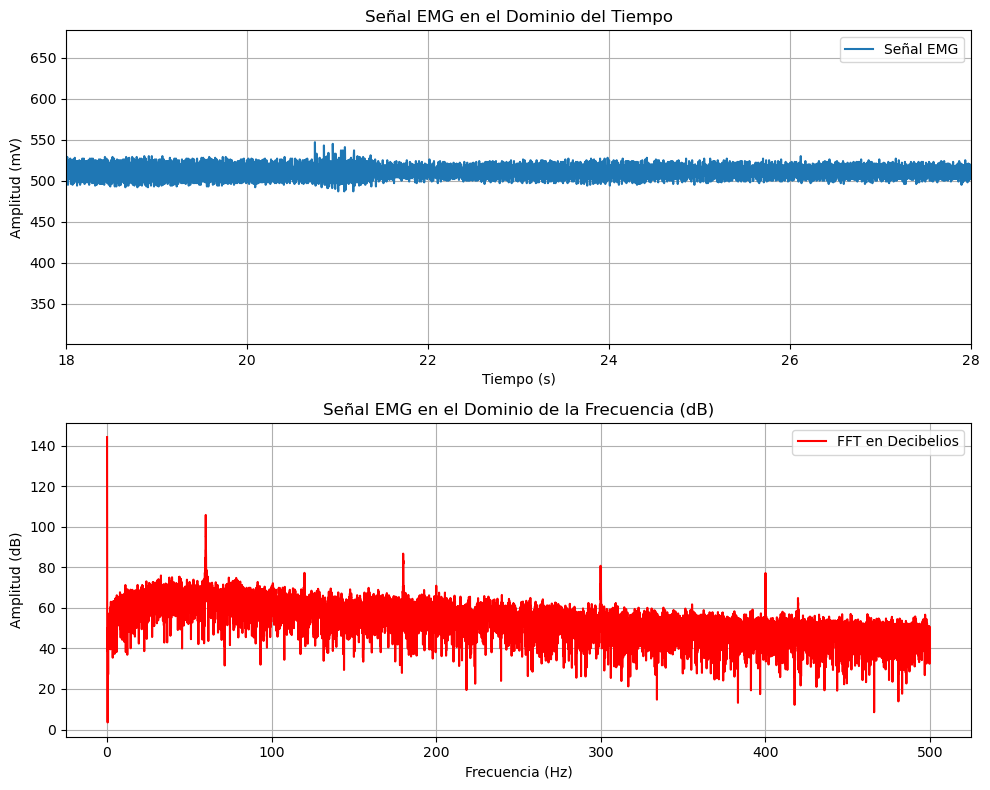

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar el archivo de texto, asegurándonos de especificar la ruta correcta
data = np.loadtxt('C:/Users/user/Desktop/Signals/sEMG_signals/Gemelo/gemelo_reposo.txt', comments='#')

# Extraer la columna correspondiente a la señal EMG (última columna: A1)
emg_signal = data[:, -1]

# Configurar la tasa de muestreo (1000 Hz, según la configuración del archivo)
sampling_rate = 1000  # Frecuencia de muestreo en Hz
n_samples = len(emg_signal)

# Crear el vector de tiempo
time = np.arange(n_samples) / sampling_rate

# Transformada de Fourier para obtener la señal en el dominio de la frecuencia
emg_fft = fft(emg_signal)
frequencies = fftfreq(n_samples, 1/sampling_rate)

# Calcular la magnitud de la FFT en decibelios
fft_magnitude = np.abs(emg_fft[:n_samples // 2])
fft_magnitude_db = 20 * np.log10(fft_magnitude)

# Frecuencias positivas para graficar
positive_freqs = frequencies[:n_samples // 2]

# Crear una figura con dos subplots (2 filas, 1 columna)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Graficar la señal EMG en el dominio del tiempo en el primer subplot
ax1.plot(time, emg_signal, label="Señal EMG")
ax1.set_title("Señal EMG en el Dominio del Tiempo")
ax1.set_xlabel("Tiempo (s)")
ax1.set_ylabel("Amplitud (mV)")  # Ajusta la unidad si es necesario
ax1.set_xlim([18, 28])
ax1.set_ylim([1000, 300])
ax1.grid(True)
ax1.legend()

# Graficar la FFT en decibelios en el segundo subplot
ax2.plot(positive_freqs, fft_magnitude_db, label="FFT en Decibelios", color='r')
ax2.set_title("Señal EMG en el Dominio de la Frecuencia (dB)")
ax2.set_xlabel("Frecuencia (Hz)")
ax2.set_ylabel("Amplitud (dB)")
ax2.grid(True)
ax2.legend()

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar la figura con ambas gráficas
plt.show()


   - Esfuerzo

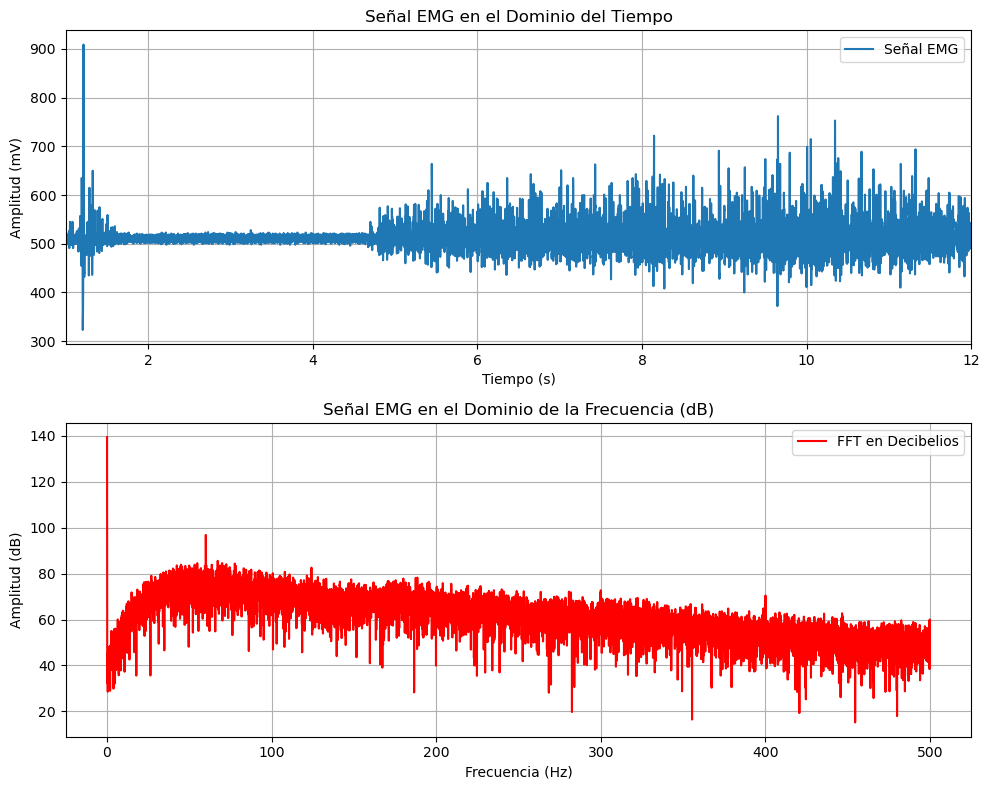

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar el archivo de texto, asegurándonos de especificar la ruta correcta
data = np.loadtxt('C:/Users/user/Desktop/Signals/sEMG_signals/Gemelo/gemelo_esfuerzo.txt', comments='#')

# Extraer la columna correspondiente a la señal EMG (última columna: A1)
emg_signal = data[:, -1]

# Configurar la tasa de muestreo (1000 Hz, según la configuración del archivo)
sampling_rate = 1000  # Frecuencia de muestreo en Hz
n_samples = len(emg_signal)

# Crear el vector de tiempo
time = np.arange(n_samples) / sampling_rate

# Transformada de Fourier para obtener la señal en el dominio de la frecuencia
emg_fft = fft(emg_signal)
frequencies = fftfreq(n_samples, 1/sampling_rate)

# Calcular la magnitud de la FFT en decibelios
fft_magnitude = np.abs(emg_fft[:n_samples // 2])
fft_magnitude_db = 20 * np.log10(fft_magnitude)

# Frecuencias positivas para graficar
positive_freqs = frequencies[:n_samples // 2]

# Crear una figura con dos subplots (2 filas, 1 columna)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Graficar la señal EMG en el dominio del tiempo en el primer subplot
ax1.plot(time, emg_signal, label="Señal EMG")
ax1.set_title("Señal EMG en el Dominio del Tiempo")
ax1.set_xlabel("Tiempo (s)")
ax1.set_ylabel("Amplitud (mV)")  # Ajusta la unidad si es necesario
ax1.set_xlim([1, 12])
ax1.set_ylim([1000, 300])
ax1.grid(True)
ax1.legend()

# Graficar la FFT en decibelios en el segundo subplot
ax2.plot(positive_freqs, fft_magnitude_db, label="FFT en Decibelios", color='r')
ax2.set_title("Señal EMG en el Dominio de la Frecuencia (dB)")
ax2.set_xlabel("Frecuencia (Hz)")
ax2.set_ylabel("Amplitud (dB)")
ax2.grid(True)
ax2.legend()

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar la figura con ambas gráficas
plt.show()


   - Sobreesfuerzo sin oposición


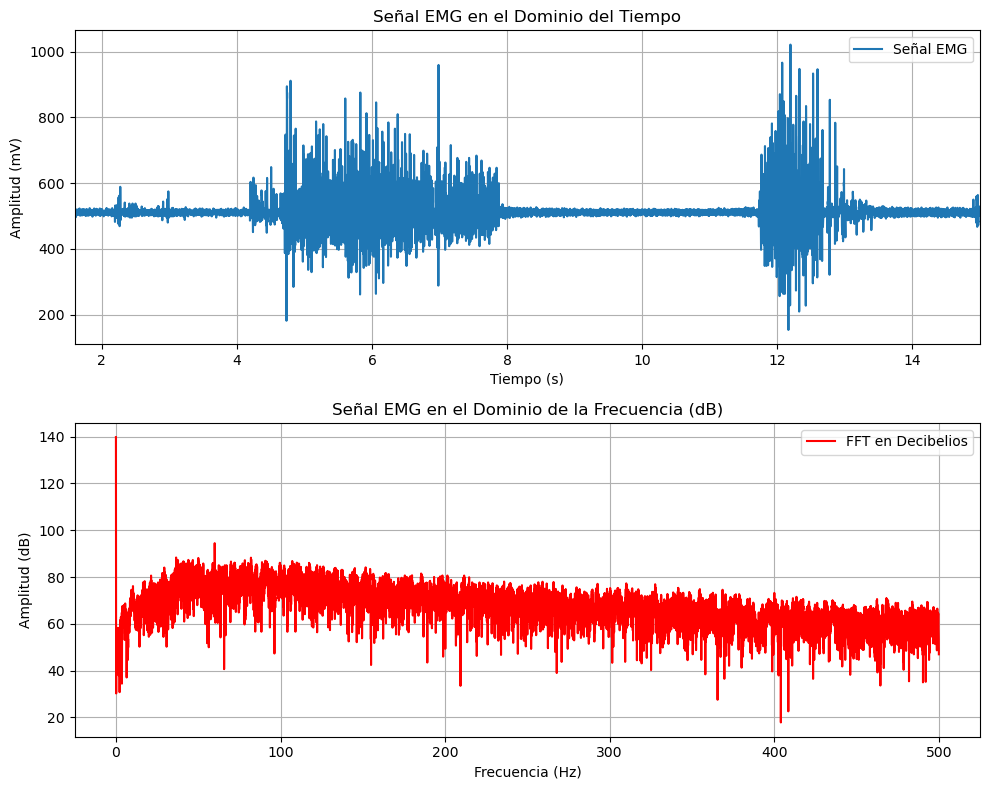

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar el archivo de texto, asegurándonos de especificar la ruta correcta
data = np.loadtxt('C:/Users/user/Desktop/Signals/sEMG_signals/Gemelo/gemelo_sobreesfuerzo.txt', comments='#')

# Extraer la columna correspondiente a la señal EMG (última columna: A1)
emg_signal = data[:, -1]

# Configurar la tasa de muestreo (1000 Hz, según la configuración del archivo)
sampling_rate = 1000  # Frecuencia de muestreo en Hz
n_samples = len(emg_signal)

# Crear el vector de tiempo
time = np.arange(n_samples) / sampling_rate

# Transformada de Fourier para obtener la señal en el dominio de la frecuencia
emg_fft = fft(emg_signal)
frequencies = fftfreq(n_samples, 1/sampling_rate)

# Calcular la magnitud de la FFT en decibelios
fft_magnitude = np.abs(emg_fft[:n_samples // 2])
fft_magnitude_db = 20 * np.log10(fft_magnitude)

# Frecuencias positivas para graficar
positive_freqs = frequencies[:n_samples // 2]

# Crear una figura con dos subplots (2 filas, 1 columna)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Graficar la señal EMG en el dominio del tiempo en el primer subplot
ax1.plot(time, emg_signal, label="Señal EMG")
ax1.set_title("Señal EMG en el Dominio del Tiempo")
ax1.set_xlabel("Tiempo (s)")
ax1.set_ylabel("Amplitud (mV)")  # Ajusta la unidad si es necesario
ax1.set_xlim([1.6, 15])
ax1.set_ylim([1000, 300])
ax1.grid(True)
ax1.legend()

# Graficar la FFT en decibelios en el segundo subplot
ax2.plot(positive_freqs, fft_magnitude_db, label="FFT en Decibelios", color='r')
ax2.set_title("Señal EMG en el Dominio de la Frecuencia (dB)")
ax2.set_xlabel("Frecuencia (Hz)")
ax2.set_ylabel("Amplitud (dB)")
ax2.grid(True)
ax2.legend()

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar la figura con ambas gráficas
plt.show()


### **4.5. Prueba 4: Tricep Braquial** <a name="id9"></a>

Descripción de prueba 4, fundamento de la señal adquirida (porque usaran ese grupo muscular de interes)
<p align="justify">
<p align="center"><img src="../../../Otros/Imagenes/Lab4_EMG/triceps.jpg" width="400" height="500"></p>
</p>

<div align="center">
   
|  **Reposo**  | **Esfuerzo** | **Sobreesfuerzo sin oposición** |
|:------------:|:---------------:|:------------:|
|<video src="https://user-images.githubusercontent.com/3d2e256b-1b0b-45e6-881a-7c67814c92b9.mp4"></video>|<video src="https://user-images.githubusercontent.com/c606cd01-5a08-4b8c-a946-48103dcaaec7.mp4"></video>|<video src= "https://user-images.githubusercontent.com/d8ca2d70-d802-41ab-8d84-04cf8d5b42a7.mp4"></video>|

[<img src="https://cdn.icon-icons.com/icons2/1713/PNG/512/iconfinder-videologoplayicon-3993847_112649.png" width="20%" height="20%">](https://www.youtube.com/playlist?list=PLKyz-4YrUo3Q2SirQwFWpUK6rOJ3rqsKD)

</div>

**Ploteo de la señal en Python: Dominio del tiempo y frecuencia**
   A coninuación se muestran la data obtenida en el dominio del tiempo y dominio de la frecuencia
   - Reposo


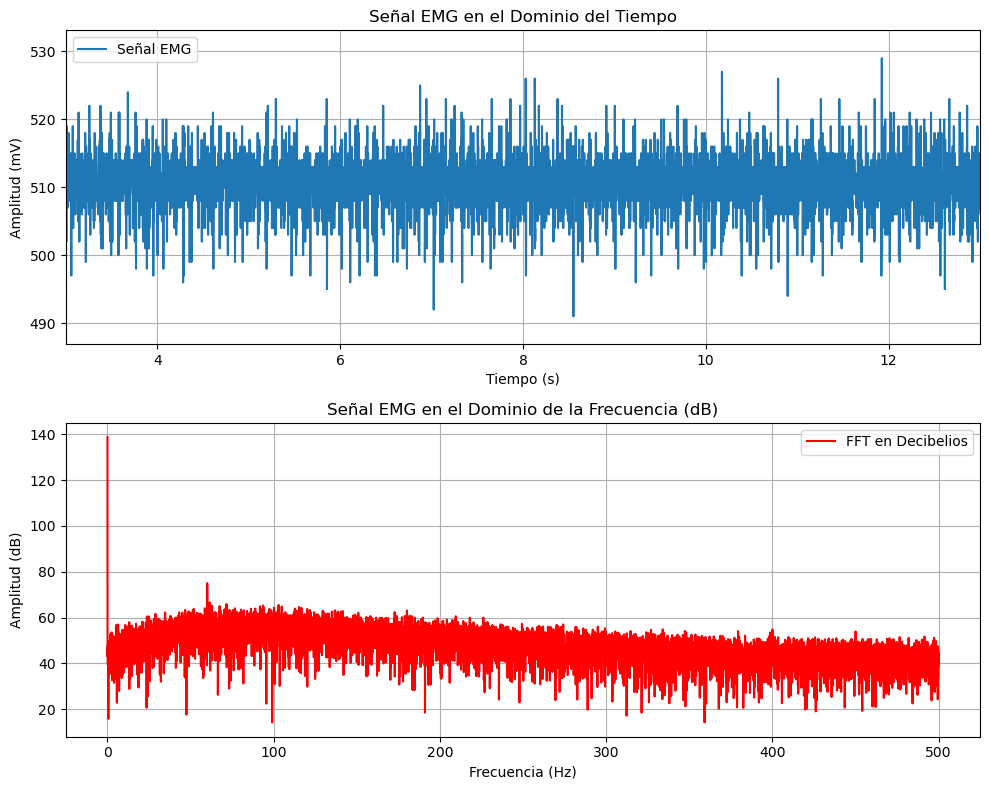

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar el archivo de texto, asegurándonos de especificar la ruta correcta
data = np.loadtxt('C:/Users/user/Desktop/Signals/sEMG_signals/Tricep/tricpes_reposo.txt', comments='#')

# Extraer la columna correspondiente a la señal EMG (última columna: A1)
emg_signal = data[:, -1]

# Configurar la tasa de muestreo (1000 Hz, según la configuración del archivo)
sampling_rate = 1000  # Frecuencia de muestreo en Hz
n_samples = len(emg_signal)

# Crear el vector de tiempo
time = np.arange(n_samples) / sampling_rate

# Transformada de Fourier para obtener la señal en el dominio de la frecuencia
emg_fft = fft(emg_signal)
frequencies = fftfreq(n_samples, 1/sampling_rate)

# Calcular la magnitud de la FFT en decibelios
fft_magnitude = np.abs(emg_fft[:n_samples // 2])
fft_magnitude_db = 20 * np.log10(fft_magnitude)

# Frecuencias positivas para graficar
positive_freqs = frequencies[:n_samples // 2]

# Crear una figura con dos subplots (2 filas, 1 columna)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Graficar la señal EMG en el dominio del tiempo en el primer subplot
ax1.plot(time, emg_signal, label="Señal EMG")
ax1.set_title("Señal EMG en el Dominio del Tiempo")
ax1.set_xlabel("Tiempo (s)")
ax1.set_ylabel("Amplitud (mV)")  # Ajusta la unidad si es necesario
ax1.set_xlim([3, 13])
ax1.set_ylim([1000, 300])
ax1.grid(True)
ax1.legend()

# Graficar la FFT en decibelios en el segundo subplot
ax2.plot(positive_freqs, fft_magnitude_db, label="FFT en Decibelios", color='r')
ax2.set_title("Señal EMG en el Dominio de la Frecuencia (dB)")
ax2.set_xlabel("Frecuencia (Hz)")
ax2.set_ylabel("Amplitud (dB)")
ax2.grid(True)
ax2.legend()

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar la figura con ambas gráficas
plt.show()


   - Esfuerzo


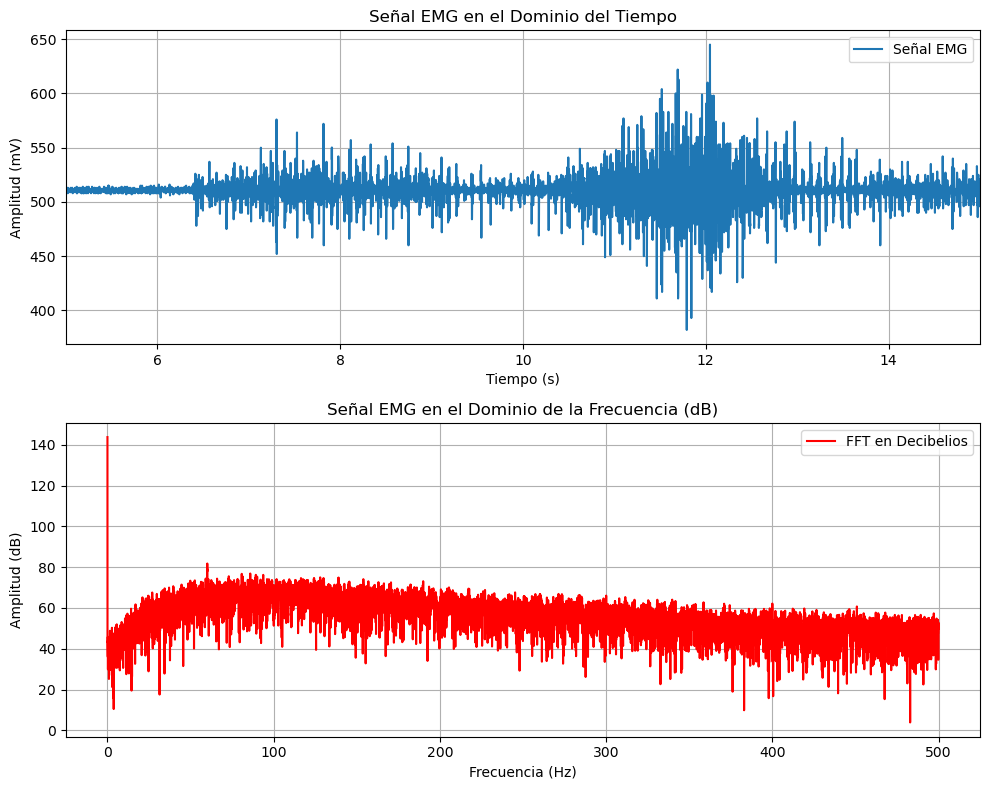

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar el archivo de texto, asegurándonos de especificar la ruta correcta
data = np.loadtxt('C:/Users/user/Desktop/Signals/sEMG_signals/Tricep/triceps_esfuerzo.txt', comments='#')

# Extraer la columna correspondiente a la señal EMG (última columna: A1)
emg_signal = data[:, -1]

# Configurar la tasa de muestreo (1000 Hz, según la configuración del archivo)
sampling_rate = 1000  # Frecuencia de muestreo en Hz
n_samples = len(emg_signal)

# Crear el vector de tiempo
time = np.arange(n_samples) / sampling_rate

# Transformada de Fourier para obtener la señal en el dominio de la frecuencia
emg_fft = fft(emg_signal)
frequencies = fftfreq(n_samples, 1/sampling_rate)

# Calcular la magnitud de la FFT en decibelios
fft_magnitude = np.abs(emg_fft[:n_samples // 2])
fft_magnitude_db = 20 * np.log10(fft_magnitude)

# Frecuencias positivas para graficar
positive_freqs = frequencies[:n_samples // 2]

# Crear una figura con dos subplots (2 filas, 1 columna)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Graficar la señal EMG en el dominio del tiempo en el primer subplot
ax1.plot(time, emg_signal, label="Señal EMG")
ax1.set_title("Señal EMG en el Dominio del Tiempo")
ax1.set_xlabel("Tiempo (s)")
ax1.set_ylabel("Amplitud (mV)")  # Ajusta la unidad si es necesario
ax1.set_xlim([5, 15])
ax1.set_ylim([1000, 300])
ax1.grid(True)
ax1.legend()

# Graficar la FFT en decibelios en el segundo subplot
ax2.plot(positive_freqs, fft_magnitude_db, label="FFT en Decibelios", color='r')
ax2.set_title("Señal EMG en el Dominio de la Frecuencia (dB)")
ax2.set_xlabel("Frecuencia (Hz)")
ax2.set_ylabel("Amplitud (dB)")
ax2.grid(True)
ax2.legend()

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar la figura con ambas gráficas
plt.show()


   - Sobreesfuerzo sin oposición

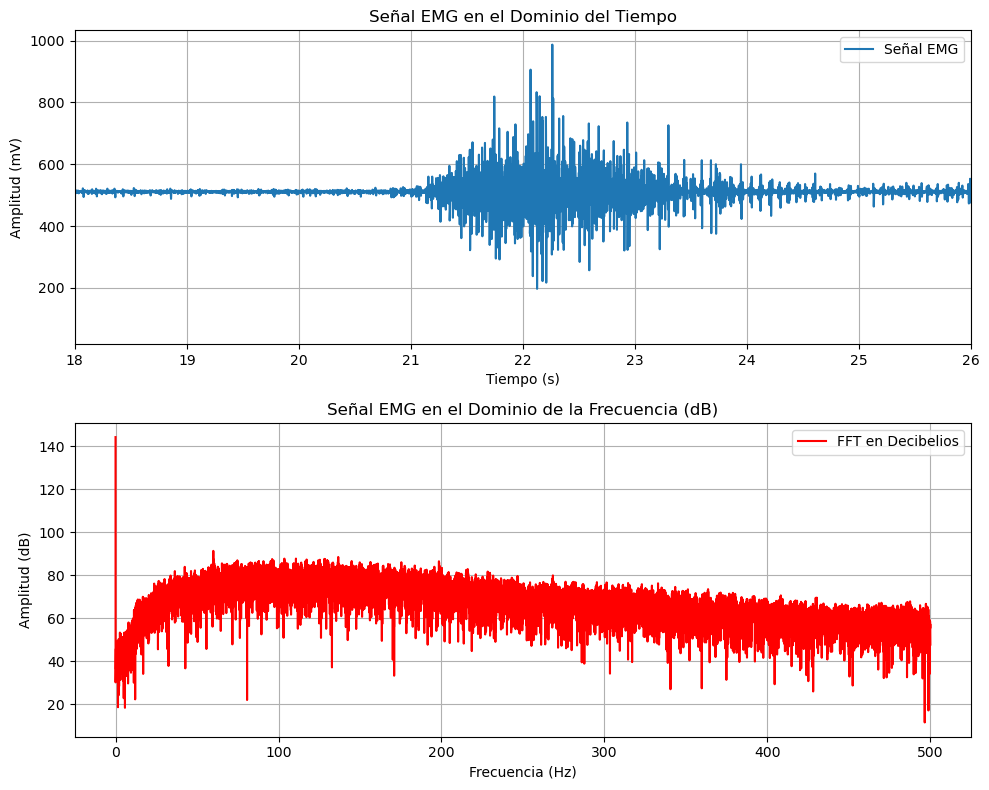

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar el archivo de texto, asegurándonos de especificar la ruta correcta
data = np.loadtxt('C:/Users/user/Desktop/Signals/sEMG_signals/Tricep/triceps_sobreesfuerzo.txt', comments='#')

# Extraer la columna correspondiente a la señal EMG (última columna: A1)
emg_signal = data[:, -1]

# Configurar la tasa de muestreo (1000 Hz, según la configuración del archivo)
sampling_rate = 1000  # Frecuencia de muestreo en Hz
n_samples = len(emg_signal)

# Crear el vector de tiempo
time = np.arange(n_samples) / sampling_rate

# Transformada de Fourier para obtener la señal en el dominio de la frecuencia
emg_fft = fft(emg_signal)
frequencies = fftfreq(n_samples, 1/sampling_rate)

# Calcular la magnitud de la FFT en decibelios
fft_magnitude = np.abs(emg_fft[:n_samples // 2])
fft_magnitude_db = 20 * np.log10(fft_magnitude)

# Frecuencias positivas para graficar
positive_freqs = frequencies[:n_samples // 2]

# Crear una figura con dos subplots (2 filas, 1 columna)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Graficar la señal EMG en el dominio del tiempo en el primer subplot
ax1.plot(time, emg_signal, label="Señal EMG")
ax1.set_title("Señal EMG en el Dominio del Tiempo")
ax1.set_xlabel("Tiempo (s)")
ax1.set_ylabel("Amplitud (mV)")  # Ajusta la unidad si es necesario
ax1.set_xlim([18, 26])
ax1.set_ylim([1000, 300])
ax1.grid(True)
ax1.legend()

# Graficar la FFT en decibelios en el segundo subplot
ax2.plot(positive_freqs, fft_magnitude_db, label="FFT en Decibelios", color='r')
ax2.set_title("Señal EMG en el Dominio de la Frecuencia (dB)")
ax2.set_xlabel("Frecuencia (Hz)")
ax2.set_ylabel("Amplitud (dB)")
ax2.grid(True)
ax2.legend()

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar la figura con ambas gráficas
plt.show()


### **4.6. Archivos** <a name="id10"></a>


- [Documentos (.txt)](https://github.com/Grupo2-IntroduccionSenalesMedicas/S_biomedica/tree/main/Documentos/BiTalino)
- [Programa de ploteo (Jupyter Notebook)](https://github.com/Grupo2-IntroduccionSenalesMedicas/S_biomedica/blob/main/Programaci%C3%B3n/Laboratorio%203/SignalPlot.ipynb)

## **5. Conclusiones y recomendaciones** <a name="id11"></a>
---


## **6. Referencias bibliográficas** <a name="id12"></a>
---